# 互评作业1：数据探索性分析与数据预处理

# 目录

## 1. 选用数据集1：Wine Reviews

### 1.1 数据可视化和摘要

    数据信息展示

    标称属性数据摘要
    
    数值属性摘要
    
    数据可视化展示

### 1.2 数据缺失值处理
    
    处理缺失的标称属性数据
    
    处理缺失的数值属性数据
    

# 1. 选用数据集1：Wine Reviews

说明：该数据集包括两个数据文件**winemag-data_first150k.csv** 和**winemag-data-130k-v2.csv**，其中第一个文件为第一版本数据文件，第二个文件是在第一版本文件基础上去重并加入额外三个属性列。
本次作业选用**winemag-data_first150k.csv** 进行主要的分析处理。**winemag-data-130k-v2.csv** 文件作为对比数据集。

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('data/winemag-data_first150k.csv')
data_e=pd.read_csv('data/winemag-data-130k-v2.csv')

## 1.1 数据可视化和摘要

    数据摘要部分共包括“数据信息展示”、“标称属性数据摘要”、“数值属性数据摘要”、“数据可视化展示”四部分。
    
### 数据信息展示

   数据集名称：Wine Reviews  数据集地址：https://www.kaggle.com/zynicide/wine-reviews
数据集描述：该数据集包括10列和15万行的葡萄酒的描述，包括国家、描述、来源葡萄园、评分、价格、省、省或州的葡萄酒产区、特定葡萄酒产区、品种、葡萄酒厂10个属性列

In [3]:
data.info() #数据集概况展示

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [4]:
data.head() #数据集前5行数据展示

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### 标称属性摘要

   该数据集中的标称属性包括国家(country)、来源葡萄园（designation）、省（province）、省或州的葡萄酒产区（region_1）、特定葡萄酒产区（region_2）、品种（variety）、葡萄酒厂（winery）。统计每一类属性出现的频数，为方便展示，每一个标称属性取其中频数最高的前10个属性数据进行展示，用直方图进行可视化并且计算前10个属性出现的频率。

In [5]:
#定义数据频数展示函数
def ab_data(attr_name):
    attr = data[attr_name]
    counts = attr.value_counts() #统计不同类别及出现频率
    print("Colunm name：",attr_name) #属性名称
    print("Different values：",len(counts)) #不同类别个数
    attr_l=counts.to_frame()
    attr_l.rename(columns={attr_name: 'counts'}, inplace=True)
    print(attr_l.iloc[:10])
    plt.bar(np.arange(10), counts.iloc[:10])
    plt.title(attr_name)
    plt.show()

Colunm name： country
Different values： 48
             counts
US            62397
Italy         23478
France        21098
Spain          8268
Chile          5816
Argentina      5631
Portugal       5322
Australia      4957
New Zealand    3320
Austria        3057


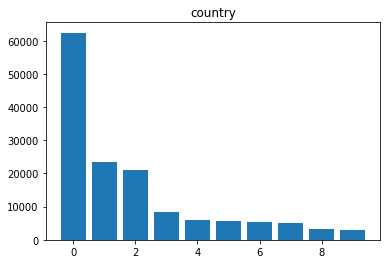

Colunm name： designation
Different values： 30621
                counts
Reserve           2752
Reserva           1810
Estate            1571
Barrel sample     1326
Riserva            754
Barrel Sample      639
Brut               624
Crianza            503
Estate Grown       449
Estate Bottled     396


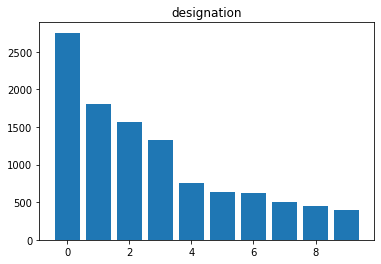

Colunm name： province
Different values： 455
                  counts
California         44508
Washington          9750
Tuscany             7281
Bordeaux            6111
Northern Spain      4892
Mendoza Province    4742
Oregon              4589
Burgundy            4308
Piedmont            4093
Veneto              3962


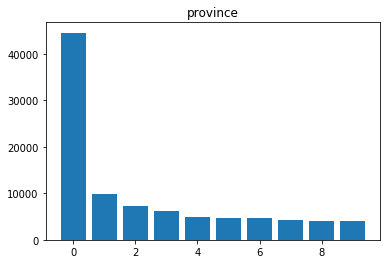

Colunm name： region_1
Different values： 1236
                      counts
Napa Valley             6209
Columbia Valley (WA)    4975
Mendoza                 3586
Russian River Valley    3571
California              3462
Paso Robles             3053
Willamette Valley       2096
Rioja                   1893
Toscana                 1885
Sonoma County           1853


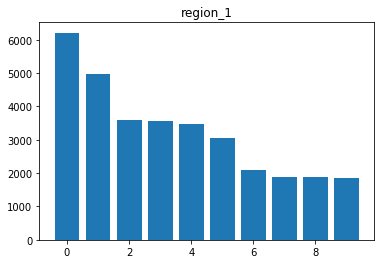

Colunm name： region_2
Different values： 18
                         counts
Central Coast             13057
Sonoma                    11258
Columbia Valley            9157
Napa                       8801
California Other           3516
Willamette Valley          3181
Mendocino/Lake Counties    2389
Sierra Foothills           1660
Napa-Sonoma                1645
Finger Lakes               1510


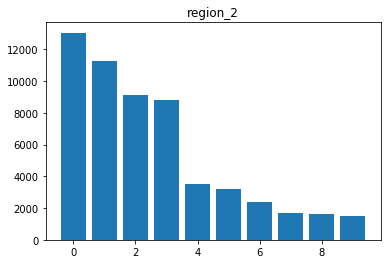

Colunm name： variety
Different values： 632
                          counts
Chardonnay                 14482
Pinot Noir                 14291
Cabernet Sauvignon         12800
Red Blend                  10062
Bordeaux-style Red Blend    7347
Sauvignon Blanc             6320
Syrah                       5825
Riesling                    5524
Merlot                      5070
Zinfandel                   3799


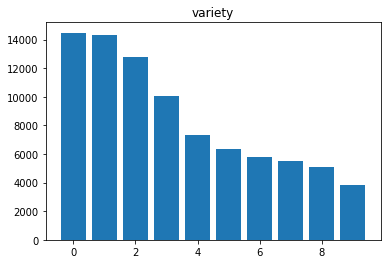

Colunm name： winery
Different values： 14810
                       counts
Williams Selyem           374
Testarossa                274
DFJ Vinhos                258
Chateau Ste. Michelle     225
Columbia Crest            217
Concha y Toro             216
Kendall-Jackson           216
Trapiche                  205
Bouchard Père & Fils      203
Kenwood                   191


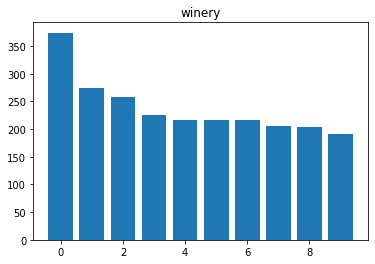

In [6]:
#标称属性的数据频数展示
ab_data('country')
ab_data('designation')
ab_data('province')
ab_data('region_1')
ab_data('region_2')
ab_data('variety')
ab_data('winery')

In [7]:
#计算出现的频率函数
def af_data(attr_name):
    attr_f=data[attr_name].value_counts(normalize=True).to_frame()
    attr_f.rename(columns={attr_name: 'frequent'}, inplace=True)
    print(attr_f.iloc[:10])
#标称属性的数据频率展示
af_data('country')
print()
af_data('designation')
print()
af_data('province')
print()
af_data('region_1')
print()
af_data('region_2')
print()
af_data('variety')
print()
af_data('winery')
print()


             frequent
US           0.413431
Italy        0.155561
France       0.139791
Spain        0.054782
Chile        0.038536
Argentina    0.037310
Portugal     0.035263
Australia    0.032844
New Zealand  0.021998
Austria      0.020255

                frequent
Reserve         0.026161
Reserva         0.017206
Estate          0.014934
Barrel sample   0.012605
Riserva         0.007168
Barrel Sample   0.006074
Brut            0.005932
Crianza         0.004782
Estate Grown    0.004268
Estate Bottled  0.003764

                  frequent
California        0.294901
Washington        0.064602
Tuscany           0.048243
Bordeaux          0.040490
Northern Spain    0.032413
Mendoza Province  0.031420
Oregon            0.030406
Burgundy          0.028544
Piedmont          0.027119
Veneto            0.026251

                      frequent
Napa Valley           0.049329
Columbia Valley (WA)  0.039525
Mendoza               0.028490
Russian River Valley  0.028371
California            0.0275

### 数值属性摘要

   该数据集中的数值属性包括价格（price），评分（points）。下面对两数值属性进行最小值、第一四份位数、平均值、第三四分位数、最大值进行就算给出五数概括，并计算缺失值个数。

In [8]:
# 数值数据的五数概括
data.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


    通过describe()函数计算的结果我们可以得到points的五数概括为：80，86，88，90，100；price的五数概括为：4，16，24，40，2300

In [9]:
#统计数值数据缺失值个数
print("point属性缺失值个数：",data.points.isnull().sum()) #计算points的缺失值个数
print()
print("price属性缺失值个数：",data.price.isnull().sum())  #计算price的缺失值个数

point属性缺失值个数： 0

price属性缺失值个数： 13695


通过统计，point属性没有缺失值，price属性中共有13695个缺失值。

### 数据可视化展示

通过直方图、q-q图以及盒图检查数据的分布以及离群点。

In [10]:
#绘制直方图函数
def draw_bar(data,att_name):
    col=data[att_name].dropna()
    plt.hist(col,100)
    plt.title(att_name)
    plt.show()
def draw_qq(data,att_name):
    col=data[att_name].dropna()
    col = (col - col.mean()) / col.std()
    fig = sm.qqplot(col, line='45')
    plt.title('q-q plot')
    plt.show()
def draw_box(data,att_name):
    fig, ax = plt.subplots(figsize=(5, 6))
    ax.set_title(att_name)
    ax.boxplot(data[att_name].dropna())
    plt.show()

#### 直方图和Q-Q图

point的直方图和Q-Q图如下所示：

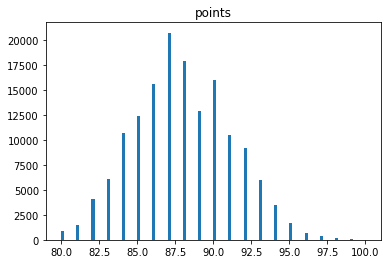

In [11]:
draw_bar(data,'points') #直方图

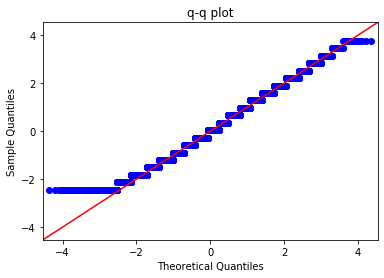

In [12]:
draw_qq(data,"points") #Q-Q图

从直方图和Q-Q图中可以看出points中的数据近似满足正态分布。

price的直方图和Q-Q图如下图所示

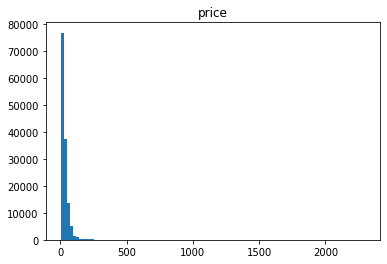

In [13]:
draw_bar(data,'price') #直方图

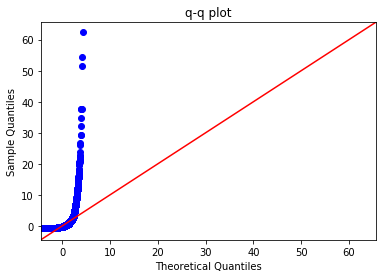

In [14]:
draw_qq(data,"price") #Q-Q图

从price的直方图和Q-Q图可以看出price中的数据不满足正态分布，数据分布向小数据倾斜。

#### 盒图

points的盒图如下图所示


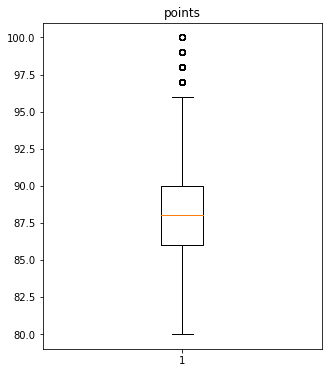

In [15]:
#points的盒图
draw_box(data,'points')

从points的盒图中我们也可以看出数据分布较为均匀，存在四个可能的离群点。

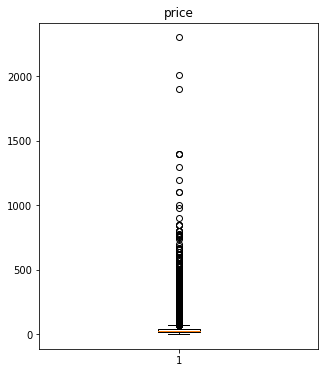

In [16]:
#prince的盒图
draw_box(data,'price')

从price的盒图中我们同样可以看出数据存在着不平衡，偏向于较小的值，且数据越大，数据点越稀疏。从盒图中我们可以看到较多的可能离群点，并且数据越稀疏的区域的数据点是离群点的可能性越大。

### 1.2 数据缺失值处理


In [17]:
# 对数据中的缺失值进行分析
data.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

#### 缺失值原因：####

从上面的结果我们可以看出共有6个属性存在缺失值。包括country、designation、price、province、region_1、region_2，它们的含义分别为国家、来源葡萄园、评分、价格、省、省或州的葡萄酒产区、特定葡萄酒产区。
下面逐一分析出现缺失值的可能原因。
1、可以发现country和province两个产地信息的属性的缺失值个数较少，出现缺失值的可能原因在于未标明产地或记录缺失
2、price属性缺失值较多，可能是由于未记录
3、region_1和region_2同样为产地信息，但缺失值也比较多，原因可能在于这些产地信息力度较细，所以包括的信息数量会相对较少，导致缺省值较多。

#### 将缺失部分剔除

In [18]:
data_new=data.dropna()

In [19]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39241 entries, 0 to 150916
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   39241 non-null  int64  
 1   country      39241 non-null  object 
 2   description  39241 non-null  object 
 3   designation  39241 non-null  object 
 4   points       39241 non-null  int64  
 5   price        39241 non-null  float64
 6   province     39241 non-null  object 
 7   region_1     39241 non-null  object 
 8   region_2     39241 non-null  object 
 9   variety      39241 non-null  object 
 10  winery       39241 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.6+ MB


从上面的结果我们可以看到数据集中数据条目数和每个属性的非缺失值均为39241，因此数据集中已经将所有缺失部分进行了剔除。下面我们将利用直方图对新旧数据集以及数据集**winemag-data-130k-v2.csv**中points属性数据进行对比。

新数据直方图：


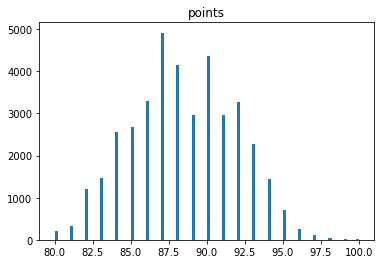

原数据直方图：


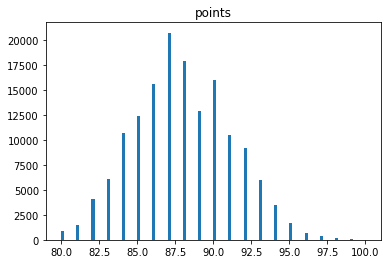

对比数据集直方图


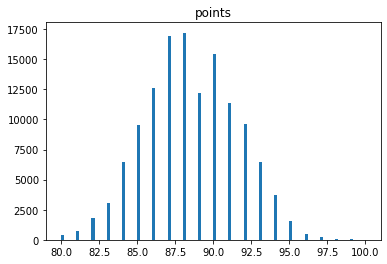

In [20]:
print("新数据直方图：")
draw_bar(data_new,'points')
print("原数据直方图：")
draw_bar(data,'points')
print("对比数据集直方图")
draw_bar(data_e,'points')

从直方图的对比我们可以看到新旧数据集中point数据分布基本没有变化仍然呈正态变化，缺失值的处理对数据分布的影响不大，但每个属性值的频数有所变化。


#### 用高频率值填补缺失值

这里我们以price属性为例

众数为： 20.0
新数据直方图：


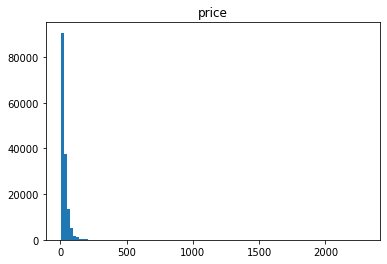

原数据直方图：


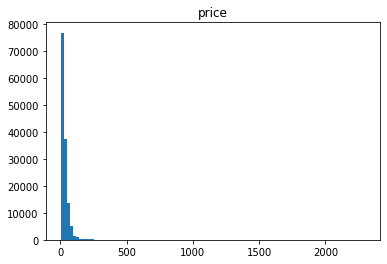

对比数据集直方图


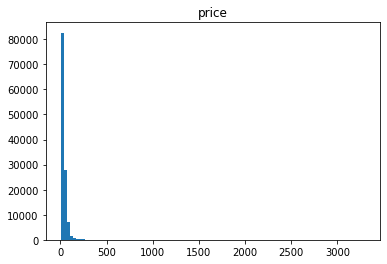

In [21]:
mode = data.mode()['price'][0]
data_h=data.fillna({'price':mode})
print('众数为：',mode)
print("新数据直方图：")
draw_bar(data_h,'price')
print("原数据直方图：")
draw_bar(data,'price')
print("对比数据集直方图")
draw_bar(data_e,'price')

In [22]:
data_h.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price              0
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

从上面的结果可以看到所有price的缺失值已经全部用众数填充，从直方图中我们可以看到数据的分布没有变，频度发生变化。

#### 通过属性的相关关系填补缺失值

我们对数值属性进行相关关系分析，因为数据集中只包括两个数值属性：price和point,因此对这两个属性进行相关性分析。

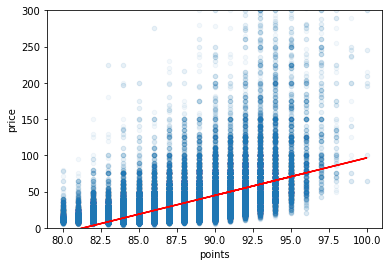

In [23]:
data_r = data.dropna(subset=['price'])
data_r.plot(kind="scatter", x="points", y="price", alpha=0.05)
x = data_r['points']
y = data_r['price']
X = np.array(x).reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
plt.plot(X, model.predict(X), 'r-')
plt.ylim(0,300)
plt.show()

从上图可以反映出points和price存在线性相关，因此可以利用线性回归模型，通过point来预测price进行缺失值的填充。

In [24]:
data_r = data.copy()
for index, row in data_r[data['price'].isna()].iterrows():
    row['price'] = model.predict(np.array(row['points']).reshape(-1, 1))
    


新数据直方图：


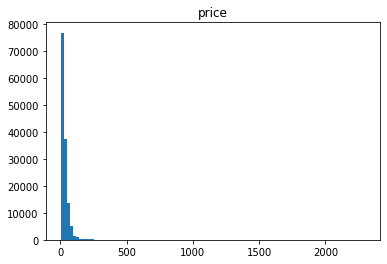

原数据直方图：


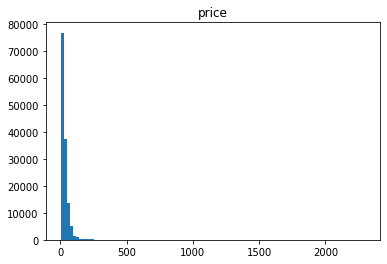

对比数据集直方图


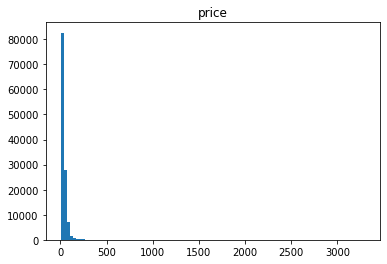

In [25]:
print("新数据直方图：")
draw_bar(data_r,'price')
print("原数据直方图：")
draw_bar(data,'price')
print("对比数据集直方图")
draw_bar(data_e,'price')

In [26]:
data_h.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price              0
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

从上面的结果可以看出所有price缺失值已经利用线性回归进行了预测填充，且数据分布并无较大变化。

#### 通过数据对象之间的相似性填补缺失值

In [27]:
data_si = data.copy()
point2price = {}
for row in data_si.iterrows():
    if point2price.get(row[1]['points'], None):
        if not pd.isnull(row[1]['price']):
            point2price[row[1]['points']][0] += row[1]['price']
            point2price[row[1]['points']][1] += 1
    else:
        if not pd.isnull(row[1]['price']):
            point2price[row[1]['points']] = [row[1]['price'], 1]
    
for k in point2price.keys():
    point2price[k][0] = round(point2price[k][0] / point2price[k][1], 4)
    
for row in data_si.iterrows():
    if pd.isnull(row[1]['price']):
        row[1]['price'] = point2price[row[1]['points']][0]
       
        

新数据直方图：


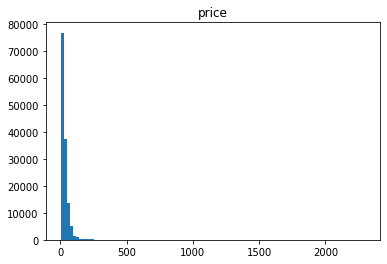

原数据直方图：


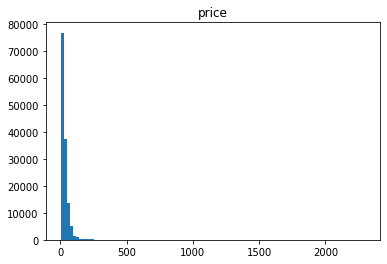

对比数据集直方图


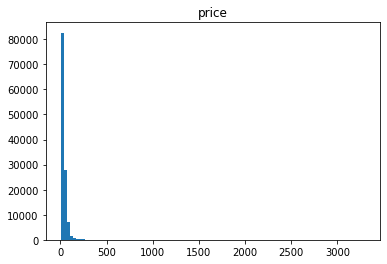

In [28]:
print("新数据直方图：")
draw_bar(data_si,'price')
print("原数据直方图：")
draw_bar(data,'price')
print("对比数据集直方图")
draw_bar(data_e,'price')

In [29]:
data_h.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price              0
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

从上面的结果可以看到所有price缺失值根据相似性填补了缺失值，且数据分布并无较大变化。

#### 对缺失值处理的总结####

从以上新旧数据集的数据分布对比来看，经过缺省值处理后数据分布并没有大的改变，我觉得原因在于price等属性缺失值个数和整体数据集的数据量相比较小，因此影响不是很大。